<a href="https://colab.research.google.com/github/faiz983735-lab/Sentiment-Analyzer-AI/blob/main/Project_Name_SentimentAnalyzerAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Core libraries
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Text cleaning
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import joblib # Ensure joblib is imported

# Download NLP resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt_tab', quiet=True)
# Hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
!mkdir -p src/preprocessing
!touch src/__init__.py
!touch src/preprocessing/__init__.py


In [3]:
# Load the dataset
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
pd.set_option('display.max_columns', None)   # for display all columns
pd.set_option('display.max_rows', None)   # for display all rows
pd.set_option('display.max_colwidth', None)  # For display the complete data of each row

In [5]:
df.shape

(57858, 2)

In [6]:
# Unique values of sentiment
print(f"The unique values in sentiment {df['sentiment'].unique()}")

The unique values in sentiment ['positive' 'negative']


Sentiment Distribution: sentiment
negative    28945
positive    28913
Name: count, dtype: int64


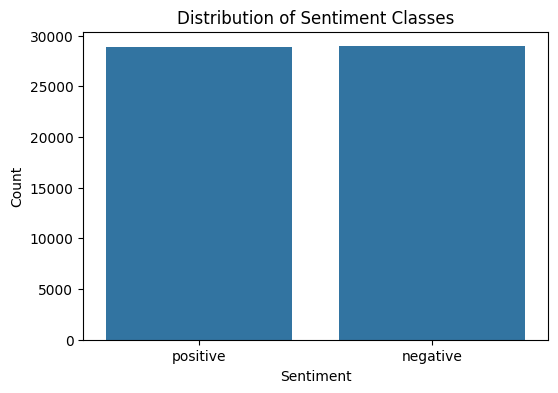

In [7]:
# Check the value counts of sentiment column
print(f"Sentiment Distribution: {df['sentiment'].value_counts()}")

# count  plot of sentiment classes
plt.figure(figsize=(6,4))
sns.countplot(x=df['sentiment'])
plt.title("Distribution of Sentiment Classes")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [8]:
# check the null values
df.isnull().sum()

,0
review,0
sentiment,0


**Text Preprocessing Pipeline (functions) We will:**
1.Remove HTML tags

2.Lowercase

3.Remove URLs and user mentions

4.Remove punctuation and digits

5.Tokenize

6.Remove stopwords

7.Lemmatize

In [9]:
# Remove html tags
from bs4 import BeautifulSoup

def remove_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

In [10]:
# remove URLs

def remove_url(text: str) -> str:
    return re.sub(r"http\S+|www\S+", "", text)


In [11]:
# Remove numbers

def remove_numbers(text: str) -> str:
    return re.sub(r"\d+", "", text)


In [12]:
# Remove extra spaces

def remove_extra_spaces(text: str) -> str:
    return re.sub(r"\s+", " ", text).strip()


In [13]:
# Remove punctuation

def remove_punctuation(text: str) -> str:
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)


In [14]:
# Emoji conversion
!pip install emoji --quiet
import emoji
def convert_emoji(text):
    return emoji.demojize(text)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 16.5 MB/s eta 0:00:00


In [15]:
# Apply the full pipeline to all reviews
stopword_set = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = text.lower()
    text = remove_html(text)
    text = remove_url(text)
    text = convert_emoji(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    text = remove_extra_spaces(text)
    words = text.split()
    words = [w for w in words if w not in stopword_set]
    words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

df['clean_text'] = df['review'].apply(clean_text)
df.head()

,review,sentiment,clean_text
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz may become comfortable uncomfortable viewingthats get touch darker side
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive,wonderful little production filming technique unassuming

In [16]:
#split the data into train-test-split
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)

In [17]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [18]:
# call the model
model_lr = LogisticRegression(max_iter=300)

# Train the model
model_lr.fit(X_train_vec, y_train)

# Predict the model
preds = model_lr.predict(X_test_vec)

**Evaluate the Model-1(Logistic Regression)**

In [19]:
accuracy_model = accuracy_score(y_test, preds)

In [20]:
metrics = {
    'accuracy':  accuracy_score(y_test, preds),
    'precision': precision_score(y_test, preds, pos_label='positive'),
    'recall_score': recall_score(y_test, preds, pos_label='positive'),
    'f1_score': f1_score(y_test, preds, pos_label='positive')
}
print(metrics)

{'accuracy': 0.8899930867611476, 'precision': 0.8851374278927723, 'recall_score': 0.897471185274385, 'f1_score': 0.8912616383360382}


In [21]:
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, pos_label='positive')
recall = recall_score(y_test, preds, pos_label='positive')
f1 = f1_score(y_test, preds, pos_label='positive')
classification = classification_report(y_test, preds)

print("Accuracy = ", accuracy)
print("Recall_Score = ", recall)
print("F1_Score = ", f1)
print("Precision_Score = ", precision)
print("Classification_report = ", classification)

Accuracy =  0.8899930867611476
Recall_Score =  0.897471185274385
F1_Score =  0.8912616383360382
Precision_Score =  0.8851374278927723
Classification_report =                precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5759
    positive       0.89      0.90      0.89      5813

    accuracy                           0.89     11572
   macro avg       0.89      0.89      0.89     11572
weighted avg       0.89      0.89      0.89     11572



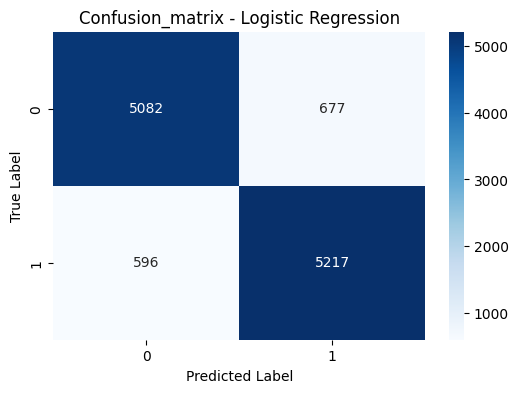

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, preds)

# let's plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion_matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [23]:
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")
joblib.dump(model_lr, "lr_model.joblib")
joblib.dump(metrics, "metrics.joblib")

['metrics.joblib']

**TRAIN LSTM MODEL**

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [25]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)

In [26]:
joblib.dump(tokenizer, "tokenizer.joblib")

['tokenizer.joblib']

In [27]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [28]:
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

In [29]:
## Build the model
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Training the Mode**

In [31]:
preds_lstm=model.fit(X_train_pad, y_train_encoded, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
579/579 ━━━━━━━━━━━━━━━━━━━━ 387s 654ms/step - accuracy: 0.7763 - loss: 0.4577 - val_accuracy: 0.8867 - val_loss: 0.2811
Epoch 2/3
579/579 ━━━━━━━━━━━━━━━━━━━━ 377s 651ms/step - accuracy: 0.9109 - loss: 0.2321 - val_accuracy: 0.8909 - val_loss: 0.2832
Epoch 3/3
579/579 ━━━━━━━━━━━━━━━━━━━━ 383s 653ms/step - accuracy: 0.9431 - loss: 0.1543 - val_accuracy: 0.8919 - val_loss: 0.2930


In [32]:
y_pred_lstm_prob = model.predict(X_test_pad)
y_pred_lstm = (y_pred_lstm_prob > 0.5).astype(int)
accuracy_model_lstm = accuracy_score(y_test_encoded, y_pred_lstm)

362/362 ━━━━━━━━━━━━━━━━━━━━ 43s 117ms/step


In [33]:
accuracy_lstm = accuracy_score(y_test_encoded, y_pred_lstm)
precision_lstm = precision_score(y_test_encoded, y_pred_lstm)
recall_lstm = recall_score(y_test_encoded, y_pred_lstm)
f1_lstm = f1_score(y_test_encoded, y_pred_lstm)
classification = classification_report(y_test_encoded, y_pred_lstm)

print("Accuracy = ", accuracy_lstm)
print("Recall_Score = ", recall_lstm)
print("F1_Score = ", f1_lstm)
print("Precision_Score = ", precision_lstm)
print("Classification_report = ", classification)

Accuracy =  0.8935361216730038
Recall_Score =  0.913469809048684
F1_Score =  0.896051299358758
Precision_Score =  0.879284649776453
Classification_report =                precision    recall  f1-score   support

           0       0.91      0.87      0.89      5759
           1       0.88      0.91      0.90      5813

    accuracy                           0.89     11572
   macro avg       0.89      0.89      0.89     11572
weighted avg       0.89      0.89      0.89     11572



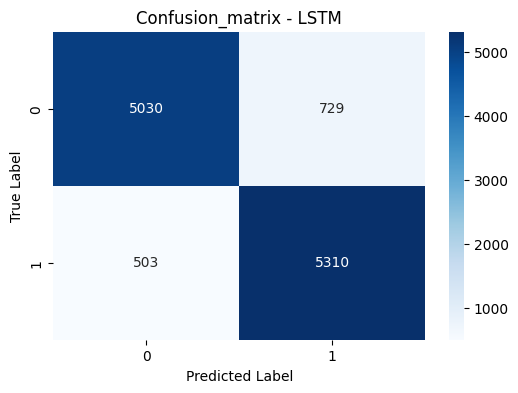

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_lstm)

# let's plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion_matrix - LSTM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [35]:
# Save model in the recommended Keras format
model.save("lstm_model.keras")

**FASTAPI AP**P

In [36]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

app = FastAPI(
    title="SentimentAnalyzerAI",
    description="IMDB Sentiment Analysis API",
    version="1.0"
)

model = joblib.load("lr_model.joblib")
vectorizer = joblib.load("tfidf_vectorizer.joblib")
metrics = joblib.load("metrics.joblib")

class ReviewRequest(BaseModel):
    text: str

class PredictionResponse(BaseModel):
    sentiment: str
    confidence: float

@app.post("/predict", response_model=PredictionResponse)
def predict_sentiment(request: ReviewRequest):
    cleaned = clean_text(request.text)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    prob = np.max(model.predict_proba(vec))
    return {
        "sentiment": pred,
        "confidence": round(float(prob), 3)
    }

@app.get("/metrics")
def get_metrics():
    return metrics


In [37]:
!pip install pyngrok --quiet
from pyngrok import ngrok
import uvicorn




In [38]:
from pyngrok import ngrok

ngrok.set_auth_token("36sJhokakGEhfLNrMdSJziqJYS2_6JDTP3u1HtZszvmqBEnEe")


In [39]:
!pip install nest_asyncio --quiet
import nest_asyncio

In [40]:
nest_asyncio.apply()

In [41]:
nest_asyncio.apply()

In [42]:
public_url = ngrok.connect(8000)
print("Public API URL:", public_url)

Public API URL: NgrokTunnel: "https://briggs-courteous-undistrustfully.ngrok-free.dev" -> "http://localhost:8000"


In [ ]:
from pyngrok import ngrok
import uvicorn

public_url = ngrok.connect(8000)
print("Public API URL:", public_url)

uvicorn.run(app, host="0.0.0.0", port=8000)
